# Preparing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


def augment(df, feat):
  #print(feat.columns[1:])
  for idx, col in enumerate(feat.columns[1:]):
    blank_df = np.full((len(data.index), 1), np.nan)
    #blank_df = [np.nan for x in range(len(data.index))]

    #print(blank_df)
    #print(data.index.shape)
    #print(feat.columns[1:].shape)
    #print(feat.columns[idx+1])
    blank_df = pd.DataFrame(blank_df, index=data.index, columns=[feat.columns[idx+1]])

    for idx in data.index:
      timestamp = np.nan
      for idx2, val in enumerate(feat['time']):
        if val == idx:
          timestamp = idx2
          break
      if type(timestamp) == int: blank_df[col].loc[idx] = feat[col].iloc[timestamp]
    df = pd.concat([df, blank_df], axis=1)
  #print(df)
  return df

def fill_nan(df):
  for col in df.columns:
    if df[col].isnull().values.any():
      mean = df[col].mean()
      df[col] = df[col].fillna(mean)
  return df

''

In [2]:
def create_classification_target(lookahead, df):
  return df.to_numpy()[:-lookahead], [1 if df['target'].iloc[i] < df['target'].iloc[i+lookahead] else 0 for i in range(len(df)-lookahead)]

In [3]:
def create_regression_target(lookahead, df):
  return df[:-lookahead].drop('target', axis=1), [df['target'].iloc[i+lookahead] for i in range(len(df)-lookahead)]

In [4]:

def load_data(path):
  df = pd.read_csv(path, index_col = 'timestamp')
  return df
tech_indicators_paths = [
    #'/content/drive/MyDrive/5156 Final Project/Datasets/technical_indicator_IBM_AROON.csv',
    '/content/drive/MyDrive/5156 Final Project/Datasets/technical_indicator_IBM_AD.csv',
    #'/content/drive/MyDrive/5156 Final Project/Datasets/technical_indicator_IBM_ADX.csv',

    '/content/drive/MyDrive/5156 Final Project/Datasets/technical_indicator_IBM_BBANDS.csv',
    #'/content/drive/MyDrive/5156 Final Project/Datasets/technical_indicator_IBM_CCI.csv',
    '/content/drive/MyDrive/5156 Final Project/Datasets/technical_indicator_IBM_EMA.csv',
    '/content/drive/MyDrive/5156 Final Project/Datasets/technical_indicator_IBM_OBV.csv',
    #'/content/drive/MyDrive/5156 Final Project/Datasets/technical_indicator_IBM_RSI.csv',
    #'/content/drive/MyDrive/5156 Final Project/Datasets/technical_indicator_IBM_SMA.csv',
    #'/content/drive/MyDrive/5156 Final Project/Datasets/technical_indicator_IBM_STOCH.csv'
                         ]
data = load_data('/content/drive/MyDrive/5156 Final Project/Datasets/daily_IBM.csv')

data

,open,high,low,close,volume
timestamp,,,,,
2024-03-27,189.60,190.960,188.60,190.80,3693305
2024-03-26,189.02,190.000,188.50,188.50,4229535
2024-03-25,190.26,190.820,188.75,188.79,3718289
2024-03-22,192.00,192.985,190.51,190.84,3988398
2024-03-21,193.00,193.370,190.01,191.90,6013561
...,...,...,...,...,...
1999-11-05,92.75,92.940,90.19,90.25,13737600
1999-11-04,94.44,94.440,90.00,91.56,16697600
1999-11-03,95.87,95.940,93.50,94.37,10369100


<Axes: >

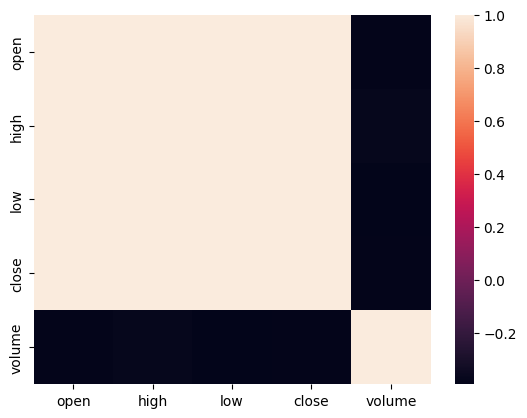

In [5]:

corr = data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [6]:
import warnings
warnings.filterwarnings("ignore")

augmented_data = load_data('/content/drive/MyDrive/5156 Final Project/Datasets/daily_IBM.csv')

for path in tech_indicators_paths:

  augmented_data = augment(augmented_data, pd.read_csv(path))
  #print(augmented_data)
data = load_data('/content/drive/MyDrive/5156 Final Project/Datasets/daily_IBM.csv')

In [7]:
data['volume'] = data['volume'].astype(float)
data

,open,high,low,close,volume
timestamp,,,,,
2024-03-27,189.60,190.960,188.60,190.80,3693305.0
2024-03-26,189.02,190.000,188.50,188.50,4229535.0
2024-03-25,190.26,190.820,188.75,188.79,3718289.0
2024-03-22,192.00,192.985,190.51,190.84,3988398.0
2024-03-21,193.00,193.370,190.01,191.90,6013561.0
...,...,...,...,...,...
1999-11-05,92.75,92.940,90.19,90.25,13737600.0
1999-11-04,94.44,94.440,90.00,91.56,16697600.0
1999-11-03,95.87,95.940,93.50,94.37,10369100.0


In [8]:
#augmented_data = augmented_data.loc[:,~augmented_data.columns.duplicated()].copy()
augmented_data

,open,high,low,close,volume,Chaikin A/D,Real Lower Band,Real Middle Band,Real Upper Band,EMA,OBV
timestamp,,,,,,,,,,,
2024-03-27,189.60,190.960,188.60,190.80,3693305,5.103415e+08,187.6855,191.888,196.0905,191.2607,395610002.0
2024-03-26,189.02,190.000,188.50,188.50,4229535,5.071489e+08,187.5975,192.683,197.7685,191.6297,391916697.0
2024-03-25,190.26,190.820,188.75,188.79,3718289,5.113785e+08,188.5502,193.027,197.5038,192.2096,396146232.0
2024-03-22,192.00,192.985,190.51,190.84,3988398,5.149531e+08,189.2971,193.510,197.7229,192.6429,399864521.0
2024-03-21,193.00,193.370,190.01,191.90,6013561,5.178779e+08,189.5826,193.916,198.2494,192.7857,403852919.0
...,...,...,...,...,...,...,...,...,...,...,...
1999-11-05,92.75,92.940,90.19,90.25,13737600,-3.220213e+07,NaN,NaN,NaN,NaN,-44306362.0
1999-11-04,94.44,94.440,90.00,91.56,16697600,-1.845963e+07,NaN,NaN,NaN,NaN,-29936833.0
1999-11-03,95.87,95.940,93.50,94.37,10369100,-1.326713e+07,NaN,NaN,NaN,NaN,-12471144.0


In [9]:
augmented_data = fill_nan(augmented_data)
augmented_data['volume'] = augmented_data['volume'].astype(float)

In [10]:
augmented_data

,open,high,low,close,volume,Chaikin A/D,Real Lower Band,Real Middle Band,Real Upper Band,EMA,OBV
timestamp,,,,,,,,,,,
2024-03-27,189.60,190.960,188.60,190.80,3693305.0,5.103415e+08,187.685500,191.888000,196.090500,191.260700,395610002.0
2024-03-26,189.02,190.000,188.50,188.50,4229535.0,5.071489e+08,187.597500,192.683000,197.768500,191.629700,391916697.0
2024-03-25,190.26,190.820,188.75,188.79,3718289.0,5.113785e+08,188.550200,193.027000,197.503800,192.209600,396146232.0
2024-03-22,192.00,192.985,190.51,190.84,3988398.0,5.149531e+08,189.297100,193.510000,197.722900,192.642900,399864521.0
2024-03-21,193.00,193.370,190.01,191.90,6013561.0,5.178779e+08,189.582600,193.916000,198.249400,192.785700,403852919.0
...,...,...,...,...,...,...,...,...,...,...,...
1999-11-05,92.75,92.940,90.19,90.25,13737600.0,-3.220213e+07,83.332562,85.996067,88.659573,85.995862,-44306362.0
1999-11-04,94.44,94.440,90.00,91.56,16697600.0,-1.845963e+07,83.332562,85.996067,88.659573,85.995862,-29936833.0
1999-11-03,95.87,95.940,93.50,94.37,10369100.0,-1.326713e+07,83.332562,85.996067,88.659573,85.995862,-12471144.0


<Axes: >

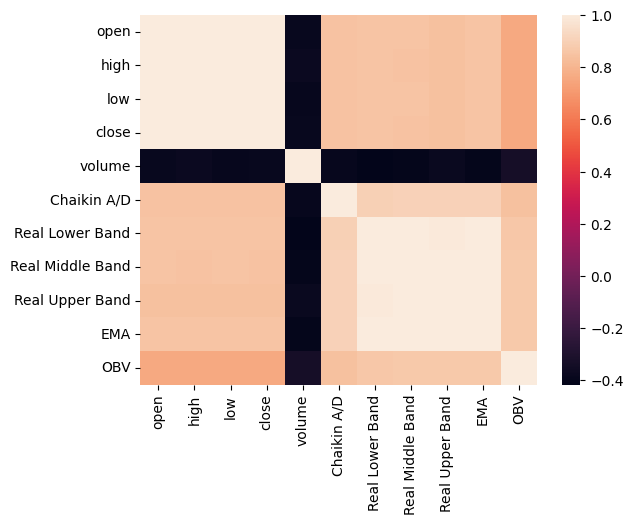

In [11]:
import seaborn as sns
corr = augmented_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [12]:
len(augmented_data.columns)

11

# Short-Term Dataset Creation

In [13]:
def compile_data(df, window_size):
  new_df = pd.DataFrame()
  for x in range(len(df)):
    for i in range(window_size, 0, -1):
      new_df[f'Close ({i} days ago)'] = df['close'].shift(i)
  new_df['target'] = df['close']
  return new_df.dropna()

short_term_data = compile_data(data, 3)


In [14]:
augmented_short_term_data = short_term_data.copy(deep=True)
for path in tech_indicators_paths:
  augmented_short_term_data = augment(augmented_short_term_data, pd.read_csv(path))
augmented_short_term_data = augmented_short_term_data.dropna()

In [15]:
for col in data.drop('close', axis=1).columns:
  augmented_short_term_data[col] = np.nan
  for timestamp in augmented_short_term_data.index:
    augmented_short_term_data.loc[timestamp, col] = data.loc[timestamp, col]
#print(augmented_short_term_data)

In [16]:
augmented_short_term_data

,Close (3 days ago),Close (2 days ago),Close (1 days ago),target,Chaikin A/D,Real Lower Band,Real Middle Band,Real Upper Band,EMA,OBV,open,high,low,volume
timestamp,,,,,,,,,,,,,,
2024-03-22,190.80,188.50,188.79,190.84,5.149531e+08,189.2971,193.5100,197.7229,192.6429,399864521.0,192.00,192.985,190.51,3988398.0
2024-03-21,188.50,188.79,190.84,191.90,5.178779e+08,189.5826,193.9160,198.2494,192.7857,403852919.0,193.00,193.370,190.01,6013561.0
2024-03-20,188.79,190.84,191.90,193.96,5.171262e+08,189.5810,194.3740,199.1670,192.7381,409866480.0,192.87,193.980,191.31,3238643.0
2024-03-19,190.84,191.90,193.96,193.34,5.139361e+08,189.7086,194.4370,199.1654,192.7088,406627837.0,191.49,193.580,190.28,5317341.0
2024-03-18,191.90,193.96,193.34,191.69,5.093922e+08,189.8783,194.4880,199.0977,192.9796,401310496.0,191.70,193.230,190.32,5410562.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-11-18,106.06,107.87,103.94,98.00,2.826463e+06,47.3462,49.2570,51.1679,49.4309,-20441141.0,94.00,98.250,93.56,18720500.0
1999-11-17,107.87,103.94,98.00,93.75,-1.466759e+07,47.3708,49.2737,51.1766,49.5367,-40022784.0,94.87,94.870,92.62,8355100.0
1999-11-16,103.94,98.00,93.75,94.62,-1.470643e+07,47.3841,49.3194,51.2547,49.5653,-31283350.0,94.62,95.000,93.00,8537400.0


Text(0.5, 1.0, 'Short-term dataset correlations (window_size=3)')

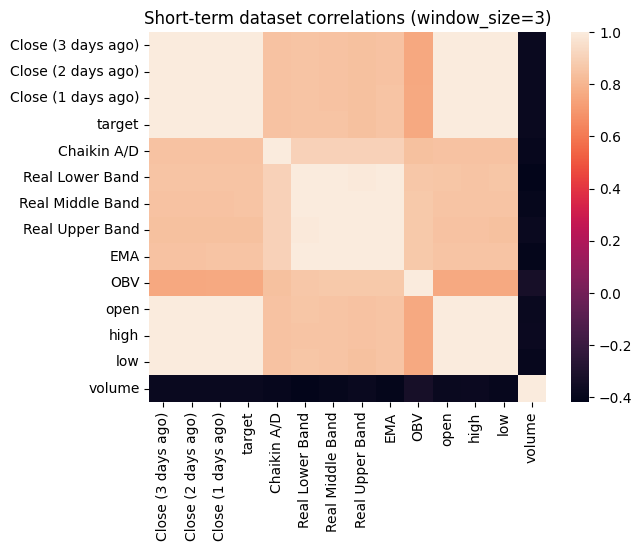

In [17]:
corr = augmented_short_term_data.corr()
ax = plt.axes()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
ax.set_title('Short-term dataset correlations (window_size=3)')

In [18]:
for col in data.drop('close', axis=1).columns:
  short_term_data[col] = np.nan
  for timestamp in short_term_data.index:
    short_term_data.loc[timestamp, col] = data.loc[timestamp, col]
short_term_data

,Close (3 days ago),Close (2 days ago),Close (1 days ago),target,open,high,low,volume
timestamp,,,,,,,,
2024-03-22,190.80,188.50,188.79,190.84,192.00,192.985,190.51,3988398.0
2024-03-21,188.50,188.79,190.84,191.90,193.00,193.370,190.01,6013561.0
2024-03-20,188.79,190.84,191.90,193.96,192.87,193.980,191.31,3238643.0
2024-03-19,190.84,191.90,193.96,193.34,191.49,193.580,190.28,5317341.0
2024-03-18,191.90,193.96,193.34,191.69,191.70,193.230,190.32,5410562.0
...,...,...,...,...,...,...,...,...
1999-11-05,97.00,93.62,93.94,90.25,92.75,92.940,90.19,13737600.0
1999-11-04,93.62,93.94,90.25,91.56,94.44,94.440,90.00,16697600.0
1999-11-03,93.94,90.25,91.56,94.37,95.87,95.940,93.50,10369100.0


<Axes: >

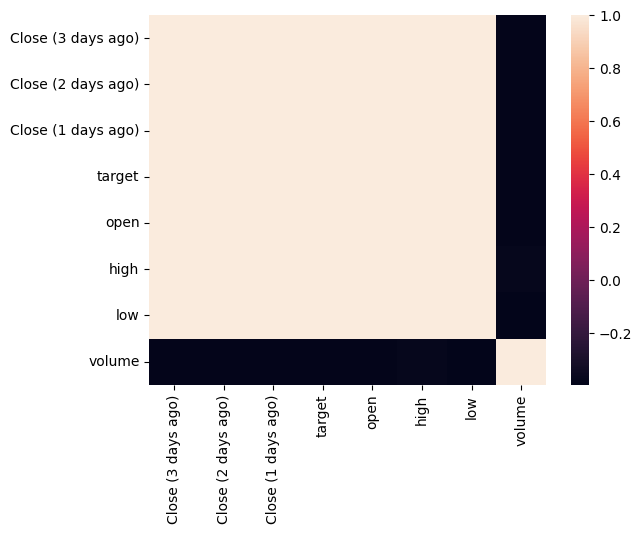

In [19]:
corr = short_term_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Defining Target Vector and Splitting Data

In [20]:
#Classification target- will the stock price of today be m days in the future than it is today?
x, classification_t = create_classification_target(10, short_term_data)

#Regression target- closing stock price of that day
X_aug, t_aug = create_regression_target(3, augmented_short_term_data)

In [21]:
len(x), len(classification_t)

(6127, 6127)

In [22]:
def split_data(df, targ, test_r):
  #df = df.to_numpy()
  targ = np.array(targ)

  train_x = df[:int(len(df)*(1-test_r))]
  test_x = df[int(len(df)*(1-test_r)):]

  train_y = targ[:int(len(df)*(1-test_r))]
  test_y = targ[int(len(df)*(1-test_r)):]

  return train_x, train_y, test_x, test_y

In [23]:

X_train, t_train, X_test, t_test = split_data(x, classification_t, 0.2)

In [24]:
X_train.shape, t_train.shape

((4901, 8), (4901,))

# Simple Neural Network (Classification)

In [25]:

model = Sequential([
    layers.Input((8,1)),
    layers.Dense((16), activation = 'relu'),
    layers.Dense((32), activation = 'relu'),
    layers.Dense((8), activation = 'relu'),
    layers.Dense((1), activation = 'sigmoid')])

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01))

hist = model.fit(X_train, np.asarray(t_train).astype(np.float32).reshape((-1,1)), epochs=20, verbose=0)

In [26]:
model.evaluate(X_test, np.asarray(t_test).astype(np.float32).reshape((-1,1)), verbose=False)

0.6944894194602966

# Linear Regression and SVM

In [27]:

ridge = Ridge()
lasso = Lasso()
X_aug, t_aug = create_regression_target(3, augmented_short_term_data)
ridge.fit(X_aug, t_aug)
ridge.score(X_aug, t_aug)

0.994371542185578

# Logistic Regression

In [28]:
len(X_test), len(t_test)

(1226, 1226)

In [29]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, t_train)

print(f'Train score: {lr_clf.score(X_train, t_train)}')
print(f'Test score: {lr_clf.score(X_test, t_test)}')

#lr_clf.fit(X_train_augmented, t_train_augmented)

#print(f'Train score: {lr_clf.score(X_train_augmented, t_train_augmented)}')
#print(f'Test score: {lr_clf.score(X_test_augmented, t_test_augmented)}')

Train score: 0.5325443786982249
Test score: 0.49836867862969003


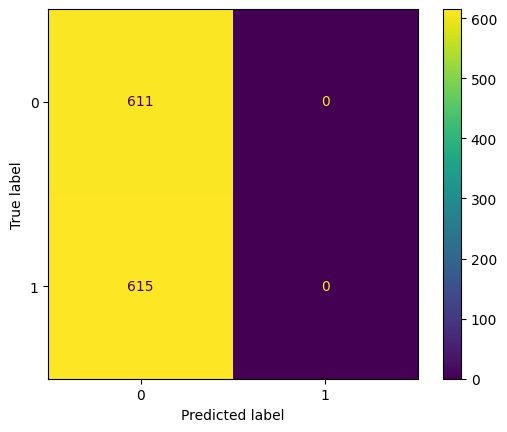

In [30]:


preds = lr_clf.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(t_test, preds, labels=lr_clf.classes_), display_labels=lr_clf.classes_)
disp.plot()

# Gaussian NB

In [31]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, t_train)
print(f'Train score: {nb_clf.score(X_train, t_train)}')
print(f'Test score: {nb_clf.score(X_test, t_test)}')

#nb_clf.fit(X_train_augmented, t_train_augmented)

#print(f'Train score: {nb_clf.score(X_train_augmented, t_train_augmented)}')
#print(f'Test score: {nb_clf.score(X_test_augmented, t_test_augmented)}')

Train score: 0.5370332585186697
Test score: 0.5309951060358891


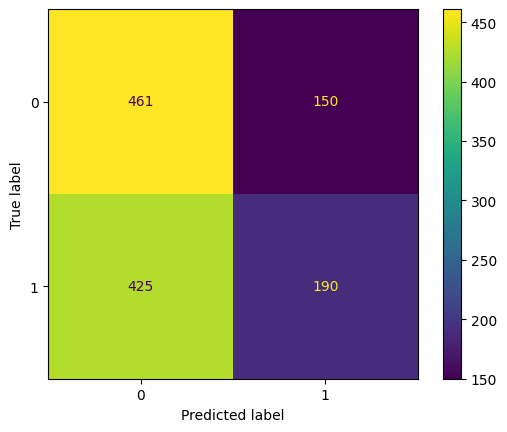

In [32]:
preds = nb_clf.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(t_test, preds, labels=nb_clf.classes_), display_labels=nb_clf.classes_)
disp.plot()

# SVC

In [33]:
svc_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
svc_clf.fit(X_train, t_train)

print(f'Train score: {svc_clf.score(X_train, t_train)}')
print(f'Test score: {svc_clf.score(X_test, t_test)}')

#svc_clf.fit(X_train_augmented, t_train_augmented)

#print(f'Train score: {svc_clf.score(X_train_augmented, t_train_augmented)}')
#print(f'Test score: {svc_clf.score(X_test_augmented, t_test_augmented)}')

Train score: 0.5786574168537033
Test score: 0.5766721044045677


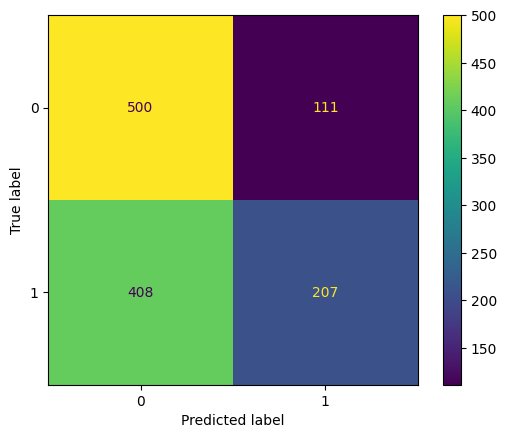

In [34]:
preds = svc_clf.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(t_test, preds, labels=lr_clf.classes_), display_labels=lr_clf.classes_)
disp.plot()

# Classification Training Loop

In [35]:
#Ensure that models are all properly defined

#NN
model = Sequential([
  layers.Input((8,1)),
  layers.Dense((16), activation = 'relu'),
  layers.Dense((32), activation = 'relu'),
  layers.Dense((8), activation = 'relu'),
  layers.Dense((1), activation = 'sigmoid')])

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01))

#LR
lr_clf = LogisticRegression()
#NB
nb_clf = GaussianNB()
#SVC
svc_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

In [36]:
#m: num days in the past
#n: num days in the future
mn_pairs = [
    [20, 5],
    [20, 3],
    [10, 3],
    [10, 1],
    [5, 1]
]
for m, n in mn_pairs:
  #Compile our short-term data, looking m days into the past (our window size)
  short_term_data = compile_data(data, m)
  for col in data.drop('close', axis=1).columns:
    short_term_data[col] = np.nan
    for timestamp in short_term_data.index:
      short_term_data.loc[timestamp, col] = data.loc[timestamp, col]


  #Get targets using n to look ahead in dataset
  x, classification_t = create_classification_target(n, short_term_data)

  #Split data
  X_train, t_train, X_test, t_test = split_data(x, classification_t, 0.2)

  #Train LR
  lr_clf.fit(X_train, t_train)

  #Train NB
  nb_clf.fit(X_train, t_train)

  #Define NN architecture and compile it
  model = Sequential([
    layers.Input((X_train.shape[1],1)),
    layers.Dense((16), activation = 'relu'),
    layers.Dense((32), activation = 'relu'),
    layers.Dense((8), activation = 'relu'),
    layers.Dense((1), activation = 'sigmoid')])

  model.compile(loss='binary_crossentropy',
                optimizer=Adam(learning_rate=0.01))

  #Train NN
  hist = model.fit(X_train, np.asarray(t_train).astype(np.float32).reshape((-1,1)), epochs=20, verbose=0)

  #Train SVC
  svc_clf.fit(X_train, t_train)


  print(f'-----Test Scores for (m,n) = {m}, {n}-----')
  print(f'LR: {lr_clf.score(X_train, t_train)}')
  print(f'NB: {nb_clf.score(X_train, t_train)}')
  print(f'NN: {model.evaluate(X_test, np.asarray(t_test).astype(np.float32).reshape((-1,1)), verbose=False)}')
  print(f'SVC: {svc_clf.score(X_train, t_train)}')
  print()

-----Test Scores for (m,n) = 20, 5-----
LR: 0.5320932134096484
NB: 0.5363859362224039
NN: 0.6971139907836914
SVC: 0.5533524121013901

-----Test Scores for (m,n) = 20, 3-----
LR: 0.528101369303086
NB: 0.5332107091763744
NN: 7.500034332275391
SVC: 0.5469037400367872

-----Test Scores for (m,n) = 10, 3-----
LR: 0.529075698836972
NB: 0.5345847786166088
NN: 0.6954941749572754
SVC: 0.5545806978167721

-----Test Scores for (m,n) = 10, 1-----
LR: 0.5158066489904141
NB: 0.5243728329594126
NN: 7.599743366241455
SVC: 0.5935141749949011

-----Test Scores for (m,n) = 5, 1-----
LR: 0.5157937640105971
NB: 0.524352965151824
NN: 0.6940200328826904
SVC: 0.6183003872019563



# Regression Training Loop

Note: exact results will likely differ from those within the paper due to randomness within certain models. However, scores will generally fall within a similar range as seen in the paper. The GRU model in particular seems to have an especially wide range.

In [37]:
ridge = Ridge()
lasso = Lasso()
lin = LinearRegression()
lstm_test = []
lstm_train = []
lstm_val = []
#m: num days in the past
#n: num days in the future
mn_pairs = [
    [20, 5],
    [20, 3],
    [10, 3],
    [10, 1],
    [5, 1]
]
for m, n in mn_pairs:
  #Compile our short-term data, looking m days into the past (our window size)
  augmented_short_term_data = compile_data(data, m)

  #Augment short-term data with technical indicators
  for path in tech_indicators_paths:
    augmented_short_term_data = augment(augmented_short_term_data, pd.read_csv(path))
  augmented_short_term_data = augmented_short_term_data.dropna()

  #Add in stock price and volume
  for col in data.drop('close', axis=1).columns:
    augmented_short_term_data[col] = np.nan
    for timestamp in augmented_short_term_data.index:
      augmented_short_term_data.loc[timestamp, col] = data.loc[timestamp, col]

  #Create target for regression, looking n days into the future
  X_aug, t_aug = create_regression_target(3, augmented_short_term_data)

  X_aug = X_aug.astype(np.float32)

  t_aug=np.array(t_aug).astype(np.float32)

  split_80 = int(len(X_aug)*.8)
  split_90 = int(len(X_aug)*.9)

  train_x, train_y = X_aug[:split_80], t_aug[:split_80]
  val_x, val_y = X_aug[split_80:split_90], t_aug[split_80:split_90]
  test_x, test_y = X_aug[split_90:], t_aug[split_90:]


  #Define and fit LSTM
  lstm = Sequential([
    layers.Input((train_x.shape[1],1)),
    layers.LSTM(128),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
  ])
  lstm.compile(loss='mse',
                optimizer=Adam(learning_rate=0.001),
                metrics = ['mean_absolute_error', 'mean_absolute_percentage_error'])

  lstm_hist = lstm.fit(train_x, train_y, epochs=15, verbose=False)

  #Define and fit GRU
  gru = Sequential([
    layers.Input((train_x.shape[1],1)),
    layers.GRU(128),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
  ])
  gru.compile(loss='mse',
                optimizer=Adam(learning_rate=0.001),
                metrics = ['mean_absolute_error', 'mean_absolute_percentage_error'])

  gru_hist = gru.fit(train_x, train_y, epochs=15, verbose=False)

  #Fit linear, ridge and lasso
  ridge.fit(train_x, train_y)
  lasso.fit(train_x, train_y)
  lin.fit(train_x, train_y)

  #Display scores
  print(f'-----Test Scores for (m,n) = {m}, {n}-----')
  print(f'Linear: {lin.score(test_x, test_y)}')
  print(f'Lasso: {lasso.score(test_x, test_y)}')
  print(f'Ridge: {ridge.score(test_x, test_y)}')
  print(f'LSTM: {100 - lstm.evaluate(test_x, test_y, verbose=False)[2]}')
  print(f'GRU: {100 - gru.evaluate(test_x, test_y, verbose=False)[2]}')
  print()

  #Track LSTM train, val, and test losses
  lstm_train.append(100 - lstm.evaluate(train_x, train_y, verbose=False)[2])
  lstm_test.append(100 - lstm.evaluate(test_x, test_y, verbose=False)[2])
  lstm_val.append(100 - lstm.evaluate(val_x, val_y, verbose=False)[2])

-----Test Scores for (m,n) = 20, 5-----
Linear: 0.41140647196623115
Lasso: 0.8369630949815413
Ridge: 0.85403731781083
LSTM: 95.62857246398926
GRU: 73.67297744750977

-----Test Scores for (m,n) = 20, 3-----
Linear: 0.41140647196623115
Lasso: 0.8369630949815413
Ridge: 0.85403731781083
LSTM: 95.91379356384277
GRU: 69.37158203125

-----Test Scores for (m,n) = 10, 3-----
Linear: 0.5594185398268439
Lasso: 0.8380301420517795
Ridge: 0.8547461842330311
LSTM: 96.81692671775818
GRU: 96.18364930152893

-----Test Scores for (m,n) = 10, 1-----
Linear: 0.5594185398268439
Lasso: 0.8380301420517795
Ridge: 0.8547461842330311
LSTM: 96.994149684906
GRU: 95.4819393157959

-----Test Scores for (m,n) = 5, 1-----
Linear: 0.7582595526566352
Lasso: 0.8392013535320154
Ridge: 0.8556112614239884
LSTM: 95.11256742477417
GRU: 93.53680849075317



In [38]:
#SVR implementation
mn_pairs = [
    [20, 5],
    [20, 3],
    [10, 3],
    [10, 1],
    [5, 1]
]

svr = Pipeline([('scaler', StandardScaler()), ('svr', SVR())])

for m, n in mn_pairs:
  #Compile our short-term data, looking m days into the past (our window size)
  augmented_short_term_data = compile_data(data, m)

  #Augment short-term data with technical indicators
  for path in tech_indicators_paths:
    augmented_short_term_data = augment(augmented_short_term_data, pd.read_csv(path))
  augmented_short_term_data = augmented_short_term_data.dropna()

  #Add in stock price and volume
  for col in data.drop('close', axis=1).columns:
    augmented_short_term_data[col] = np.nan
    for timestamp in augmented_short_term_data.index:
      augmented_short_term_data.loc[timestamp, col] = data.loc[timestamp, col]

  #Create target for regression, looking n days into the future
  X_aug, t_aug = create_regression_target(3, augmented_short_term_data)

  X_aug = X_aug.astype(np.float32)

  t_aug=np.array(t_aug).astype(np.float32)

  split_80 = int(len(X_aug)*.8)
  split_90 = int(len(X_aug)*.9)

  train_x, train_y = X_aug[:split_80], t_aug[:split_80]
  val_x, val_y = X_aug[split_80:split_90], t_aug[split_80:split_90]
  test_x, test_y = X_aug[split_90:], t_aug[split_90:]

  svr.fit(train_x, train_y)
  #Display scores
  print(f'-----Test Scores for (m,n) = {m}, {n}-----')
  print(f'SVR: {svr.score(test_x, test_y)}')
  print()

-----Test Scores for (m,n) = 20, 5-----
SVR: 0.729850163422921

-----Test Scores for (m,n) = 20, 3-----
SVR: 0.729850163422921

-----Test Scores for (m,n) = 10, 3-----
SVR: 0.7709438430721938

-----Test Scores for (m,n) = 10, 1-----
SVR: 0.7709438430721938

-----Test Scores for (m,n) = 5, 1-----
SVR: 0.7942773784219139



In [39]:
#Track training and testing error rates to check for overfitting
ridge_test = []
lasso_test = []
lin_test = []

ridge_train = []
lasso_train = []
lin_train = []

mn_pairs = [
    [20, 5],
    [20, 3],
    [10, 3],
    [10, 1],
    [5, 1]
]

ridge = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])
lasso = Pipeline([('scale', StandardScaler()), ('lasso', Lasso())])
lin = LinearRegression()

#Plot train scores for ridge and lasso
for m, n in mn_pairs:
  #Compile our short-term data, looking m days into the past (our window size)
  augmented_short_term_data = compile_data(data, m)

  #Augment short-term data with technical indicators
  for path in tech_indicators_paths:
    augmented_short_term_data = augment(augmented_short_term_data, pd.read_csv(path))
  augmented_short_term_data = augmented_short_term_data.dropna()

  #Add in stock price and volume
  for col in data.drop('close', axis=1).columns:
    augmented_short_term_data[col] = np.nan
    for timestamp in augmented_short_term_data.index:
      augmented_short_term_data.loc[timestamp, col] = data.loc[timestamp, col]

  #Create target for regression, looking n days into the future
  X_aug, t_aug = create_regression_target(3, augmented_short_term_data)

  X_aug = X_aug.astype(np.float32)

  t_aug=np.array(t_aug).astype(np.float32)

  split_80 = int(len(X_aug)*.8)
  split_90 = int(len(X_aug)*.9)

  train_x, train_y = X_aug[:split_80], t_aug[:split_80]
  val_x, val_y = X_aug[split_80:split_90], t_aug[split_80:split_90]
  test_x, test_y = X_aug[split_90:], t_aug[split_90:]


  ridge.fit(train_x, train_y)
  lasso.fit(train_x, train_y)
  lin.fit(train_x, train_y)

  ridge_train.append(ridge.score(train_x, train_y))
  ridge_test.append(ridge.score(test_x, test_y))

  lasso_train.append(lasso.score(train_x, train_y))
  lasso_test.append(lasso.score(test_x, test_y))

  lin_train.append(lin.score(train_x, train_y))
  lin_test.append(lin.score(test_x, test_y))